## How to generate fog effects onto images?


1) explore the method

Reference paper: 

https://embedded.uni-tuebingen.de/assets/publications/vonBernuth-Volk-Bringmann_Snow_Fog.pdf

https://arxiv.org/pdf/1708.07819.pdf Semantic Foggy Scene Understanding with Synthetic Data

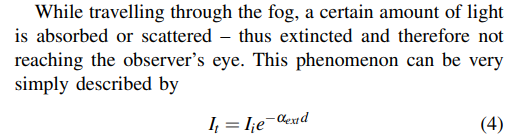   
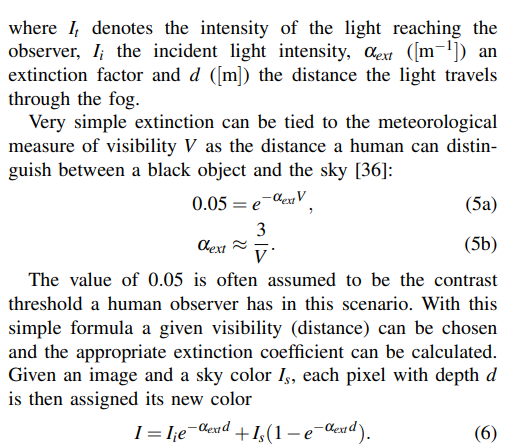  

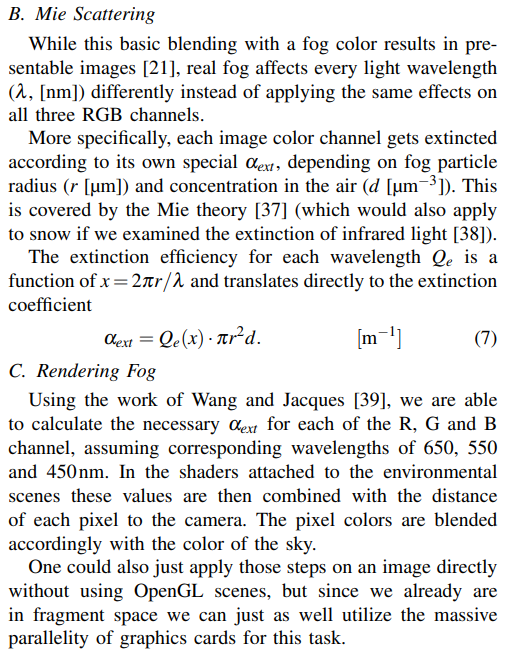

In [1]:
import cv2
import numpy as np

def add_fog(image, depth, fog_color=(255, 255, 255), alpha=0.5):
    """
    Add fog to the image based on depth information.

    Parameters:
        image: numpy.ndarray
            Input image in BGR format.
        depth: numpy.ndarray
            Depth map of the image.
        fog_color: tuple, optional
            Color of the fog in BGR format.
        alpha: float, optional
            Extinction coefficient.

    Returns:
        foggy_image: numpy.ndarray
            Image with fog added.
    """
    h, w, _ = image.shape

    # Calculate fog intensity based on depth
    fog_intensity = np.exp(-alpha * depth)  # alpha is the extinction coefficient of fog

    # Blend image with fog color based on fog intensity
    foggy_image = np.zeros_like(image)
    for c in range(3):    # Iterates over color channels. In OpenCV, images are stored in BGR order, so here to process each channel in BGR order. 
        foggy_image[:, :, c] = image[:, :, c] * fog_intensity + fog_color[c] * (1 - fog_intensity)  # namely the equation (6) in the paper
    return foggy_image



# for c in range(3):：这个循环迭代每个通道（颜色通道）：蓝色（B）、绿色（G）和红色（R）。在 OpenCV 中，图像是以 BGR 顺序存储的，所以在这里我们按照 BGR 的顺序处理每个通道。
# foggy_image[:, :, c] = image[:, :, c] * fog_intensity + fog_color[c] * (1 - fog_intensity)：
# foggy_image[:, :, c]：表示输出图像中当前通道（c）的像素值。这里两个 : 表示选择所有行和列。
# image[:, :, c]：表示输入图像中当前通道（c）的像素值。
# fog_intensity：是根据深度图计算出的雾的强度。对于每个通道，它将原始图像中的像素值乘以雾的强度，这样深度较高的像素会受到更大程度的影响。
# fog_color[c]：是雾的颜色在当前通道（c）的值。
# (1 - fog_intensity)：这是雾的强度的补数，表示未被雾遮挡的像素在输出图像中的贡献。如果像素位于较大深度处，这个值会较小，因此输出图像中该像素受到的雾的影响会更强。

# 在这个函数中，alpha 是一个参数，表示雾的消光系数（extinction coefficient）。消光系数是一个物理量，描述了光在通过介质时的衰减程度。
# 在这里，它用来控制雾的密度和强度。较大的 alpha 值会导致更大程度的衰减，从而产生更浓密的雾。


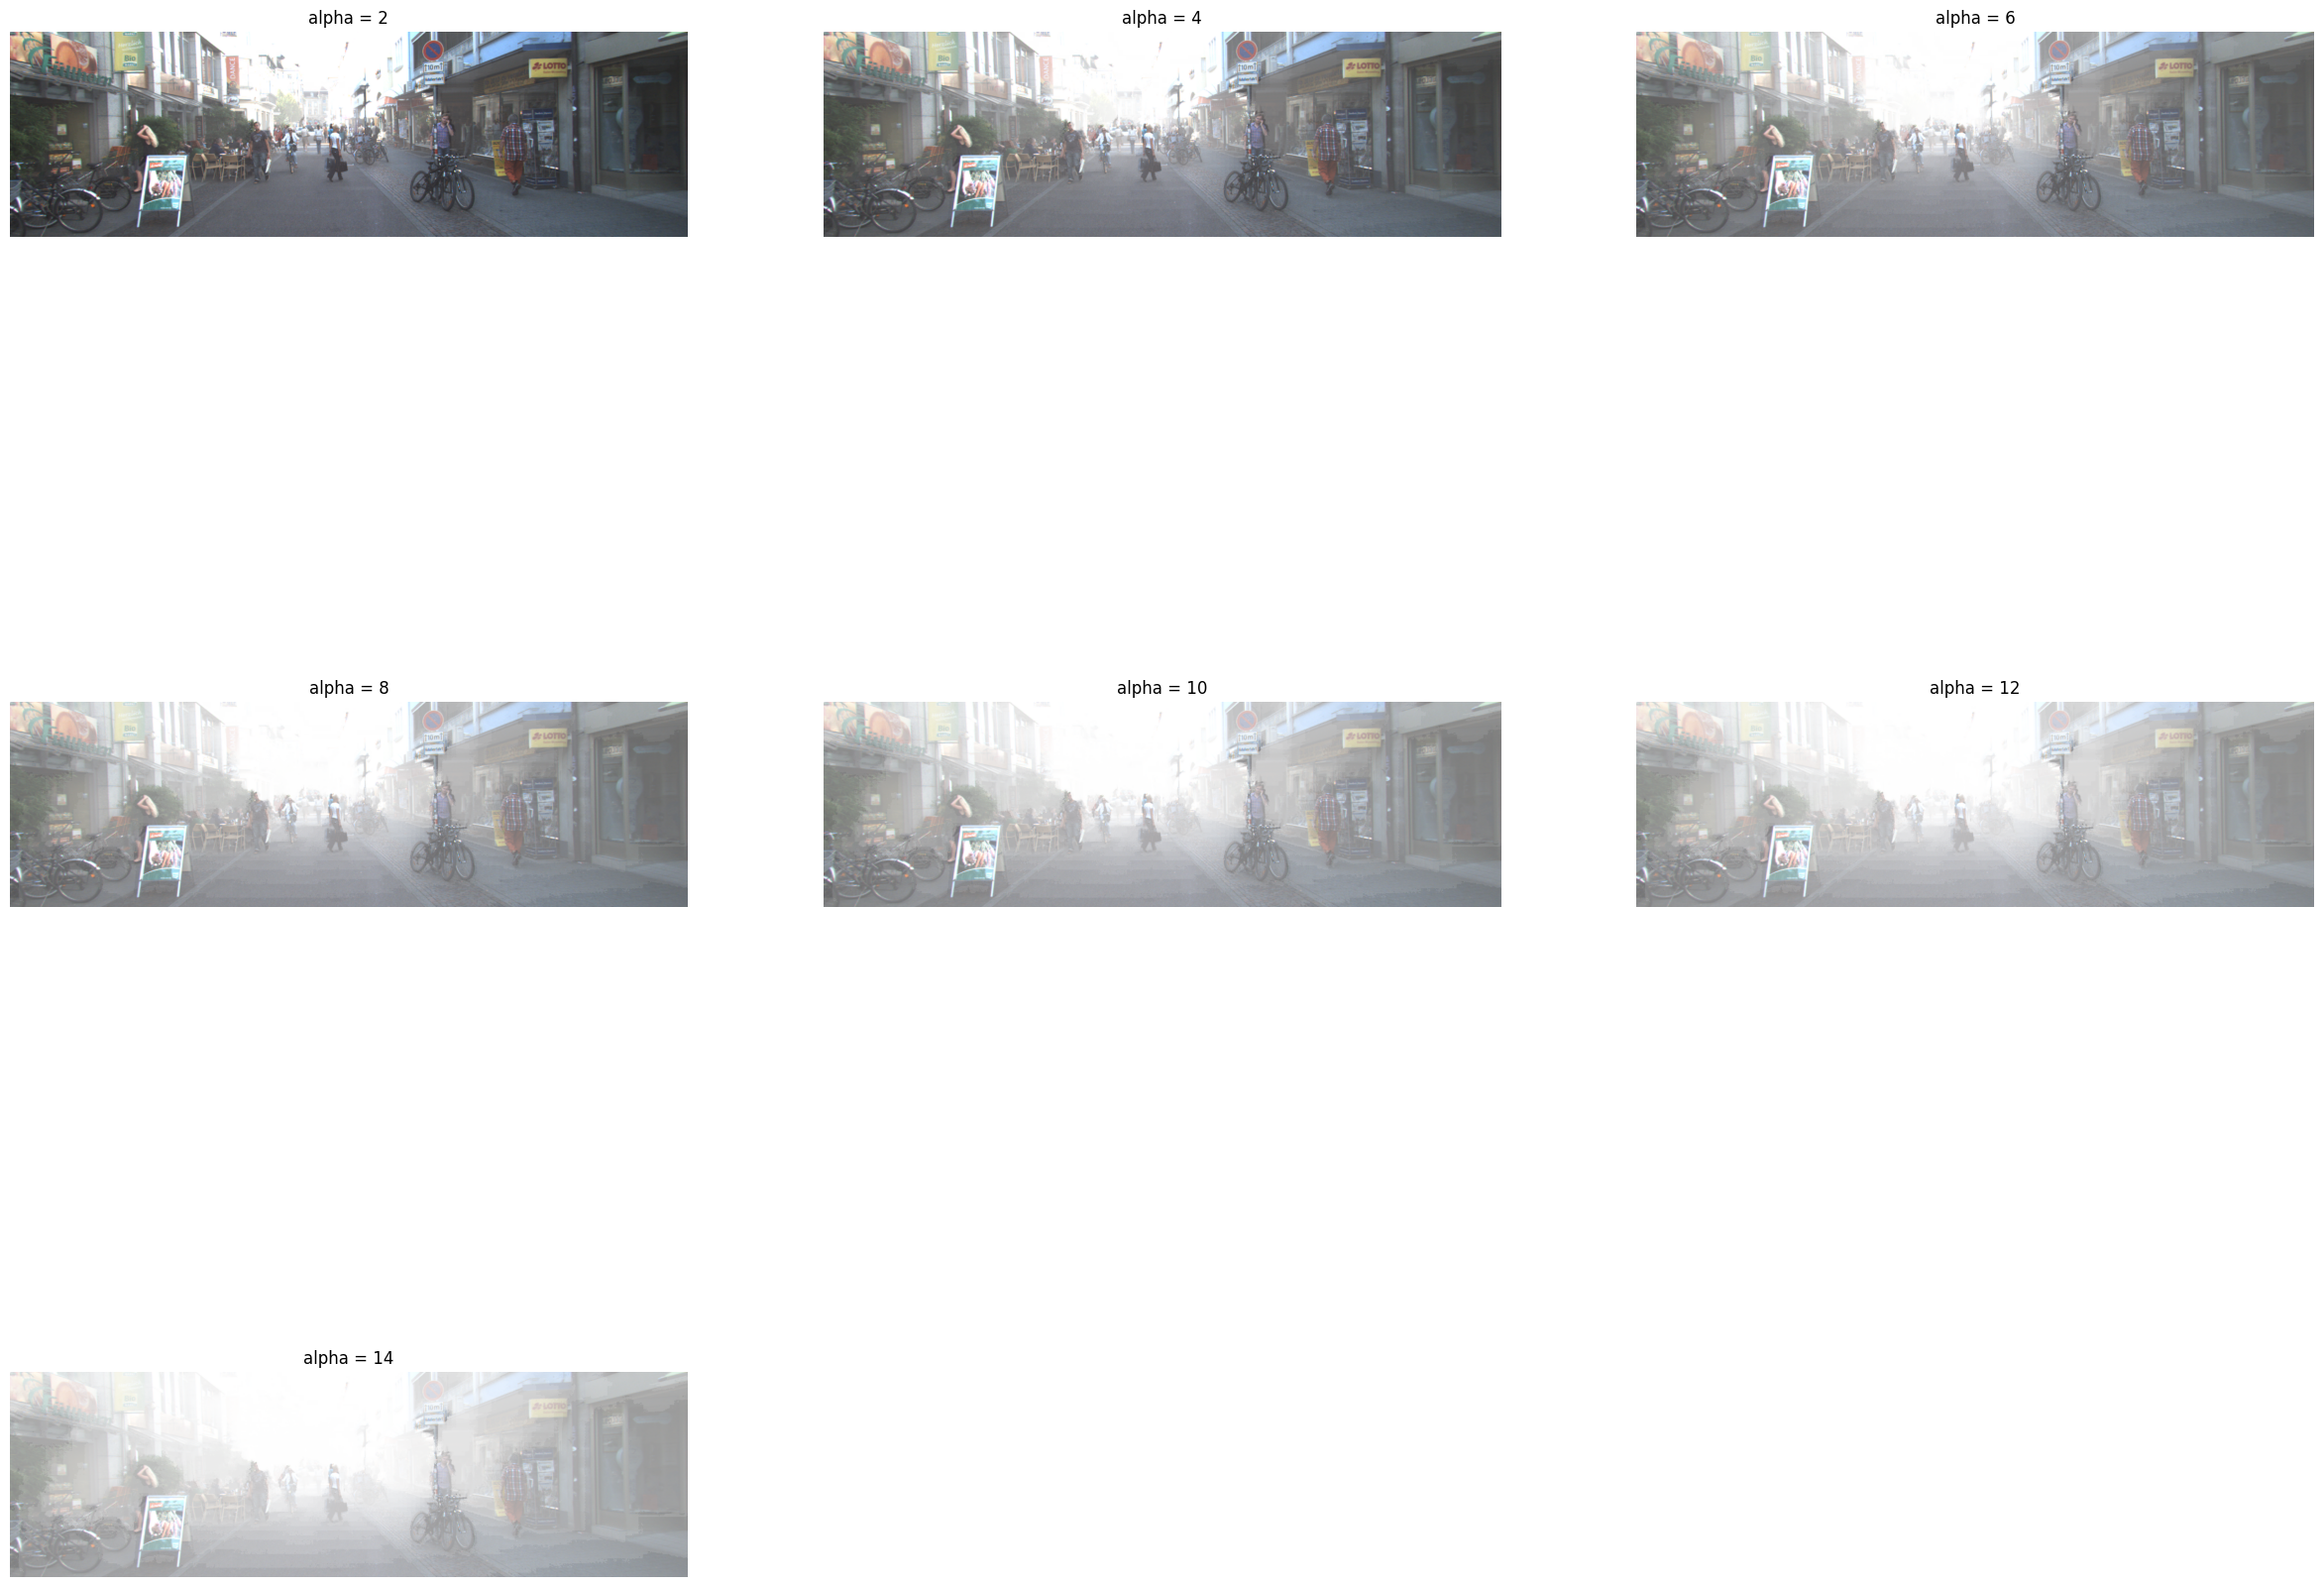

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read the image and depth map
image = cv2.imread(r'D:\UNI\ISSIS\Practice\3\KITTI\420_original\006130.png')  # path to the image
depth = cv2.imread(r'D:\UNI\ISSIS\Practice\3\KITTI\depth\006130.png', cv2.IMREAD_GRAYSCALE)  #  path to the depth map

# Resize depth map to match image size
depth = cv2.resize(depth, (image.shape[1], image.shape[0]))  # original image = 1242*375，depth image = 1216*352

# Normalize depth map
depth = depth / np.max(depth)

# Display results using matplotlib
plt.figure(figsize=(30, 60))

for i, alpha_value in enumerate(range(2, 15, 2), 1):
    foggy_image = add_fog(image, depth, alpha=alpha_value)  
    
    plt.subplot(7, 3, i)
    plt.imshow(cv2.cvtColor(foggy_image, cv2.COLOR_BGR2RGB))
    plt.title(f'alpha = {alpha_value}')
    plt.axis('off')

plt.show()



# Hi I‘m Hanyue, a master student here. 
# Actually I saw you on Monday. I have to tell you that you are the most beautiful lady I have ever seen in NUS.  

# What’s your name?
# What are you studying? 

# Can I  buy you a coffee some time? 
# Do you mind if I add your WeChat or Instagram?



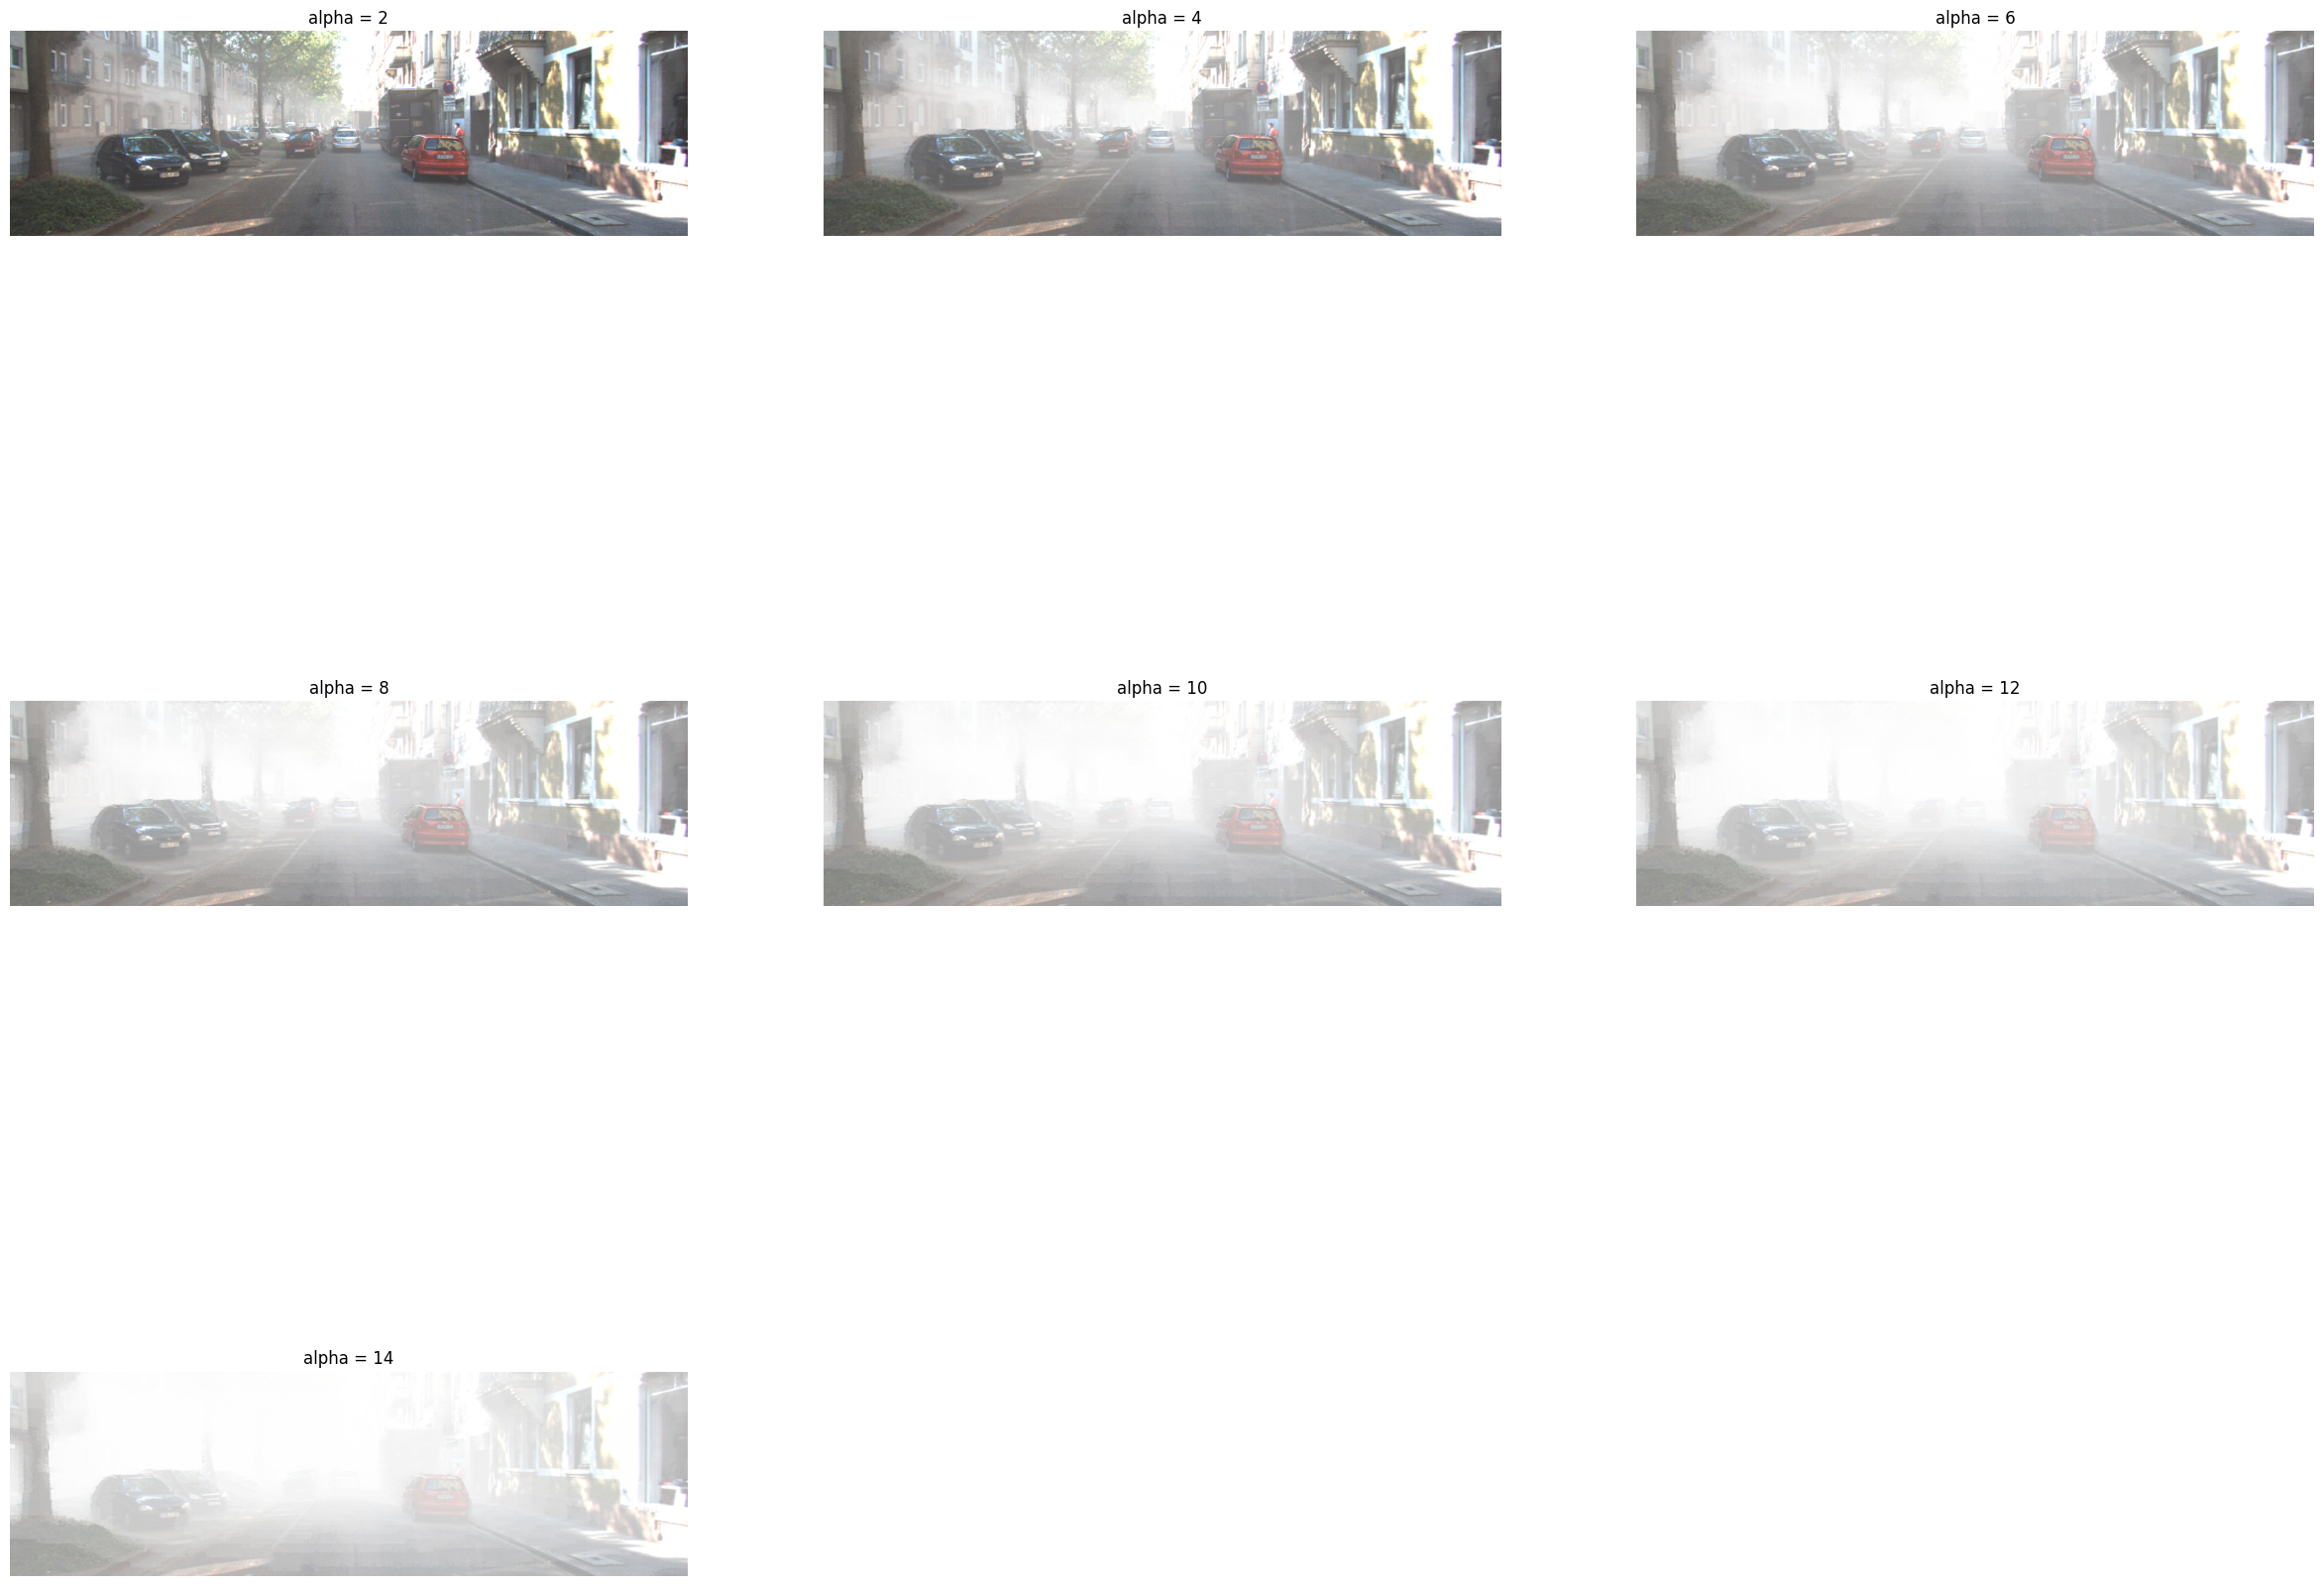

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Read the image and depth map
image = cv2.imread(r'D:\UNI\ISSIS\Practice\3\KITTI\420_original\006224.png')  # path to the image
depth = cv2.imread(r'D:\UNI\ISSIS\Practice\3\KITTI\depth\006224.png', cv2.IMREAD_GRAYSCALE)  #  path to the depth map

# Resize depth map to match image size
depth = cv2.resize(depth, (image.shape[1], image.shape[0]))

# Normalize depth map
depth = depth / np.max(depth)

# Display results using matplotlib
plt.figure(figsize=(30, 60))

for i, alpha_value in enumerate(range(2, 15, 2), 1):
    foggy_image = add_fog(image, depth, alpha=alpha_value)  # Convert alpha to range [0, 2]
    
    plt.subplot(7, 3, i)
    plt.imshow(cv2.cvtColor(foggy_image, cv2.COLOR_BGR2RGB))
    plt.title(f'alpha = {alpha_value}')
    plt.axis('off')

plt.show()




2.1）实现添加雾，并保存在相应路径

- image, 从文件夹D:\UNI\ISSIS\Practice\3\KITTI\temp中按文件名增序依次读入png文件。(注意每次读入一张png图片)
- depth, 从文件夹D:\UNI\ISSIS\Practice\3\KITTI\depth中读入一张同样名字的png图片
- 读入第i张图片时（i=1,2，...）, 计算k和alpha值:if i%4 != 0, k = i%4, alpha = 2*k; if i%4 == 0, alpha = 8
- 对读入的第i张png image添加alpha值的雾
- 把这张图像保存到文件夹 D:\UNI\ISSIS\Practice\3\KITTI\2000_augmented\fog\fog_alpha_{alpha}。(注意这里的k是一个变量，alpha的取值有2,4,6,8)

In [1]:
import cv2
import numpy as np
import os

def add_fog(image, depth, fog_color=(255, 255, 255), alpha=0.5):   # 设 alpha 默认值值为 0.5
    """
    Add fog to the image based on depth information.

    Parameters:
        image: numpy.ndarray
            Input image in BGR format.
        depth: numpy.ndarray
            Depth map of the image.
        fog_color: tuple, optional
            Color of the fog in BGR format.
        alpha: float, optional
            Extinction coefficient.

    Returns:
        foggy_image: numpy.ndarray
            Image with fog added.
    """
    h, w, _ = image.shape

    # Calculate fog intensity based on depth
    fog_intensity = np.exp(-alpha * depth)

    # Blend image with fog color based on fog intensity
    foggy_image = np.zeros_like(image)
    for c in range(3):    # Iterates over color channels. In OpenCV, images are stored in BGR order, so here to process each channel in BGR order. 
        foggy_image[:, :, c] = image[:, :, c] * fog_intensity + fog_color[c] * (1 - fog_intensity)  # " : " to select all rows and columns.

    return foggy_image



In [5]:
# image_folder = r'D:\UNI\ISSIS\Practice\3\KITTI\5000_6999'
# depth_folder = r'D:\UNI\ISSIS\Practice\3\KITTI\depth'
# output_folder = r'D:\UNI\ISSIS\Practice\3\KITTI\2000_augmented\fog_1'

# # Ensure output folder exists
# os.makedirs(output_folder, exist_ok=True)

# # Get list of image filenames and sort them
# image_filenames = os.listdir(image_folder)
# image_filenames.sort()

# # Loop through each image
# for i, image_filename in enumerate(image_filenames, start=1):
#     # Read image
#     image_path = os.path.join(image_folder, image_filename)
#     image = cv2.imread(image_path)
    
#     if image is None:
#         print(f"Failed to read image: {image_path}")
#         continue

#     # Construct depth file path
#     depth_path = os.path.join(depth_folder, image_filename)

#     # Read depth
#     depth = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
    
#     if depth is None:
#         print(f"Failed to read depth map: {depth_path}")
#         continue

#     # Resize depth map to match image size
#     depth = cv2.resize(depth, (image.shape[1], image.shape[0]))

#     # Normalize depth map
#     depth = depth / np.max(depth)

#     # Calculate alpha value, alpha = 2,4,6,8
#     k = i % 4
#     if k != 0:
#         alpha = 2*k
#     else:
#         alpha = 8

#     # Add fog to image
#     foggy_image = add_fog(image, depth, alpha=alpha)

#     # Save foggy image to appropriate folder
#     alpha_folder = os.path.join(output_folder, f"fog_alpha_{alpha}")
#     os.makedirs(alpha_folder, exist_ok=True)
#     output_path = os.path.join(alpha_folder, image_filename)
#     cv2.imwrite(output_path, foggy_image)

# print("Foggy images generated and saved successfully.")

Foggy images generated and saved successfully.
